In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import kcca
sys.path.append("..")


# In this example, kCCA is used to find relationships between 
# different views of a UCI dataset with handwritten digits. 
# All of the views have 2000 samples. We will only be using the first two
# views in this tutorial. View 1 has 76 dimensions and View 2 has 216 dimensions.
from datasets.base import load_UCImultifeature

data = load_UCImultifeature()
views = data[0]
view_1 = views[0]
view_2 = views[1]

In [2]:
# Create a linear kcca object as an instantiation of the KCCA object class
kcca_l = kcca.KCCA(ktype ="linear", reg = 0.0001, numCC = 2)

# Use the train() method to find a linear projection between the two views.
kcca_l.fit([view_1, view_2])

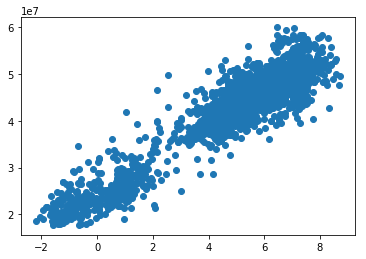

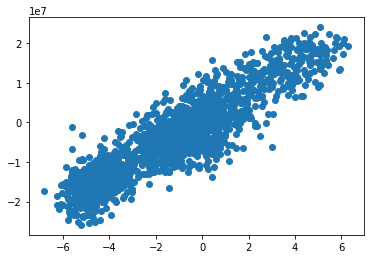

In [3]:
# Use the comps_ variable, which holds the canonical components to project both views into a common space
fig = plt.figure()
plt.scatter(kcca_l.comps_[0][:,0],kcca_l.comps_[1][:,0])
fig = plt.figure()
plt.scatter(kcca_l.comps_[0][:,1],kcca_l.comps_[1][:,1])

In [4]:
# Call cancorrs_ to find the correlation between the two canonical components
kcca_l.cancorrs_

array([0.93643618, 0.901117  ])

In [5]:
# Create a polynomial kcca object as an instantiation of the KCCA object class
kcca_p = kcca.KCCA(ktype ="poly", reg = 0.0001, numCC = 2, degree = 4)

# Use the train() method to find a polynomial projection between the two views.
kcca_p.fit([view_1, view_2])

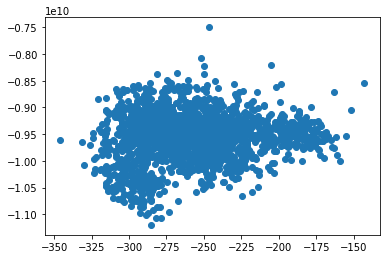

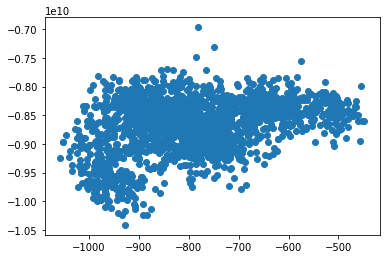

In [6]:
# Use the comps_ variable, which holds the canonical components to project both views into a common space
fig = plt.figure()
plt.scatter(kcca_p.comps_[0][:,0],kcca_p.comps_[1][:,0])
fig = plt.figure()
plt.scatter(kcca_p.comps_[0][:,1],kcca_p.comps_[1][:,1])

In [7]:
# Call cancorrs_ to find the correlation between the two canonical components
kcca_p.cancorrs_

array([0.13654408, 0.35362344])

In [8]:
# Create a gaussian kcca object as an instantiation of the KCCA object class
kcca_g = kcca.KCCA(ktype ="gaussian", reg = 0.0001, numCC = 2, gausigma = 0.25)

# Use the train() method to find a gaussian projection between the two views.
kcca_g.fit([view_1, view_2])

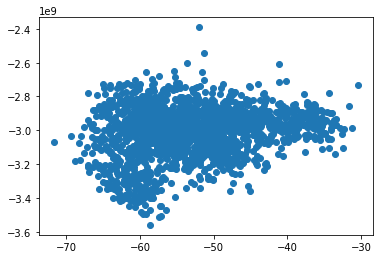

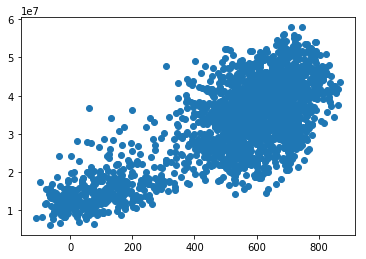

In [9]:
# Use the comps_ variable, which holds the canonical components to project both views into a common space
fig = plt.figure()
plt.scatter(kcca_g.comps_[0][:,0],kcca_g.comps_[1][:,0])
fig = plt.figure()
plt.scatter(kcca_g.comps_[0][:,1],kcca_g.comps_[1][:,1])

In [10]:
# Call cancorrs_ to find the correlation between the two canonical components
kcca_g.cancorrs_

array([0.19872405, 0.75162478])

In [11]:
# If you are splitting test data into training and testing datasets, you can use 
# train() on the training dataset and then using validate() on the testing dataset.
# validate() will use the canonical weights on the testing data to bring the test data
# into the projected shared space.